In [ ]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

import os
from dotenv import load_dotenv

 
load_dotenv()

True

In [33]:
wiki_wrapper = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=wiki_wrapper)
wiki

WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'd:\\LIFE\\_BOOTCAMP_MANDIRI\\B11_LANGGRAPH\\.venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=2, lang='en', load_all_available_meta=False, doc_content_chars_max=500))

In [ ]:
response = wiki.invoke("Apa itu attention is all you need")
print(response) 

Page: August 2025 Indonesian protests
Summary: On 25 August until early September 2025, several protests took place in Indonesia as part of a larger civil unrest that began in early 2025 over economic frustrations and a proposed hike in housing subsidies for members of parliament. Protesters initially demanded the House of Representatives reverse its subsidy schemes and penalize its members who made insensitive statements, as well as pass the Confiscation of Assets Act for lawmakers convicted of


In [ ]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv

In [26]:
response = arxiv.invoke("Machine learning")

In [27]:
print(response)

Published: 2023-06-07
Title: Changing Data Sources in the Age of Machine Learning for Official Statistics
Authors: Cedric De Boom, Michael Reusens
Summary: Data science has become increasingly essential for the production of official statistics, as it enables the automated collection, processing, and analysis of large amounts of data. With such data science practices in place, it enables more timely, more insightful and more flexible reporting. However, the quality and integrity of data-science-


In [28]:
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_ENDPOINT"] = os.getenv("LANGSMITH_ENDPOINT")
os.environ["LANGSMITH_TRACING"] = os.getenv("LANGSMITH_TRACING")
os.environ["LANGSMITH_PROJECT"] = "ReActAgent"




In [29]:
from langchain_community.tools.tavily_search import TavilySearchResults

# Tavily search Tool
tavily_tool = TavilySearchResults()

In [36]:

def add(a: int, b:int) -> int:
    """
        Function untuk melakukan pertambahan pada suatu bilangan
        
        argumen:
            a : bilangan pertama
            b : bilangan kedua
    """
    
    return a + b
    
# Menyatukan Tools yang ada
tools = [arxiv, wiki, tavily_tool, add]

In [37]:
from langchain_groq import ChatGroq

model = ChatGroq(model_name="openai/gpt-oss-120b",  streaming=True)
llm_with_tools = model.bind_tools(tools)

In [38]:
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage

response = llm_with_tools.invoke([HumanMessage(content=f"Carikan aku bootcamp ai engineer yang gratis dan buku yang murah")])

In [39]:
response.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'free AI engineer bootcamp'},
  'id': 'fc_622d2082-da6a-4cd9-a2ba-b00d7d547b0d',
  'type': 'tool_call'}]

In [40]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages : Annotated[list[AnyMessage], add_messages]

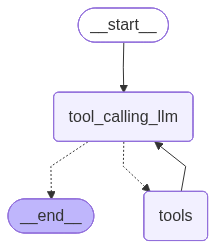

In [42]:
from IPython.display import display, Image
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

# node definisi
def tool_calling_llm(state:State) -> State:
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm", tools_condition
)
builder.add_edge("tools", "tool_calling_llm")

memory = MemorySaver()
builder_graph = builder.compile(checkpointer=memory)
display(Image(builder_graph.get_graph().draw_mermaid_png()))


In [46]:
config = {"configurable" : {"thread_id": "2"}}

response = builder_graph.invoke({"messages" : HumanMessage(content=f"cari berita tentang sistem rag dan pekerjaannya lalu cari di arxiv jurnal yang sesuai dan kemudian berikan saya hasil 20 + 20")}, config=config)

for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

cari berita tentang sistem rag dan pekerjaannya lalu cari di arxiv jurnal yang sesuai dan kemudian berikan saya hasil 20 + 20
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_6f36bd35-7e6f-4621-9e30-39b218a61e2d)
 Call ID: fc_6f36bd35-7e6f-4621-9e30-39b218a61e2d
  Args:
    query: RAG system news retrieval augmented generation
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "What is RAG (Retrieval-Augmented Generation) & how it works?", "url": "https://www.meilisearch.com/blog/what-is-rag", "content": "A semantic search system might return three internal docs: one about OAuth, one about token storage, and one about login flows. You’d need to read through them to piece together the answer.\n   A RAG system would retrieve the same documents, extract the r

In [17]:
response = builder_graph.invoke({"messages" : HumanMessage(content=f"berikan berata terbaru tentang ai saat ini")})

for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

berikan berata terbaru tentang ai saat ini
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_42d87b94-706d-4d84-8bd3-54c0d6db076f)
 Call ID: fc_42d87b94-706d-4d84-8bd3-54c0d6db076f
  Args:
    query: latest AI news 2024
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "2024: A year of extraordinary progress and advancement in AI", "url": "https://blog.google/innovation-and-ai/products/2024-ai-extraordinary-progress-advancement/", "content": "## Bullet points\n\n This article summarizes Google's AI advancements in 2024, highlighting their commitment to responsible development.\n Google released Gemini 2.0, a powerful AI model designed for the \"agentic era,\" and integrated it into various products.\n They made significant progress in generative AI, releas

In [18]:
response = builder_graph.invoke({"messages" : HumanMessage(content=f"Apa itu machine learning?")})

for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

Apa itu machine learning?
================================== Ai Message ==================================

**Machine Learning (Pembelajaran Mesin)** adalah sebuah bidang dalam kecerdasan buatan (Artificial Intelligence/AI) yang fokus pada pengembangan algoritma dan model statistik yang memungkinkan komputer **belajar dari data** tanpa harus diprogram secara eksplisit untuk setiap tugas. Dengan kata lain, alih‑alih menuliskan aturan‑aturan logika yang kaku, kita melatih sistem dengan contoh‑contoh (data) sehingga ia dapat menemukan pola, membuat prediksi, atau mengambil keputusan secara otomatis.

### Konsep Utama

| Konsep | Penjelasan |
|--------|------------|
| **Data** | Kumpulan contoh (fitur) yang menggambarkan masalah, misalnya gambar, teks, sinyal suara, atau data tabular. |
| **Model** | Struktur matematis (mis. jaringan saraf, pohon keputusan, regresi) yang memetakan input menjadi output. |
| **